In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist.data.values, mnist.target.values
print("The shape of X:", X.shape)
print("The shape of y:", y.shape)

The shape of X: (70000, 784)
The shape of y: (70000,)


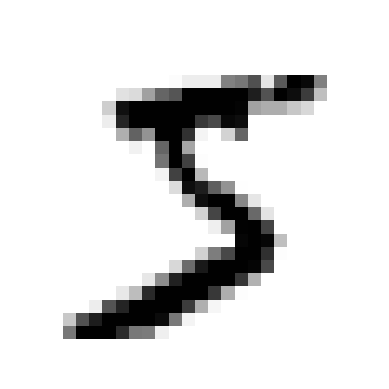

In [6]:
import matplotlib as mpl
from matplotlib import pyplot as plt

digit = X[0]
digit_reshaped = digit.reshape(28, 28)
plt.imshow(digit_reshaped, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [7]:
y[0]

'5'

In [8]:
y = y.astype(np.uint8)
y[0]

5

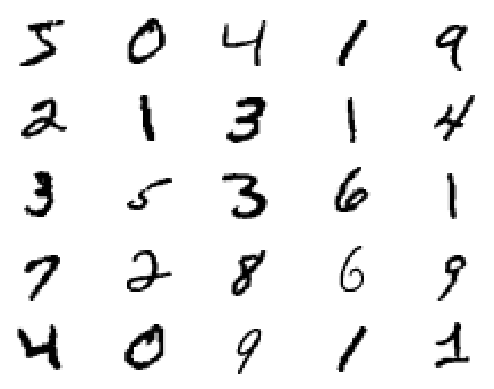

In [9]:
for i in range(25):
    digits = X[i]
    digits_reshaped = digits.reshape(28,28)
    plt.subplot(5, 5, i+1)
    plt.imshow(digits_reshaped, cmap = mpl.cm.binary, interpolation = 'nearest')
    plt.axis('off')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd.predict([digit])

array([ True])

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")
print(scores)

[0.95035 0.96035 0.9604 ]


In [15]:
# This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about
# 90% of the time.
# So, this code snippet tells us that accuracy is not preferred metric for this type of dataset
from sklearn.base import BaseEstimator

class Never5(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5 = Never5()
never_5_scores = cross_val_score(never_5, X_train, y_train_5, cv=3, scoring="accuracy")
print(never_5_scores)

[0.91125 0.90855 0.90915]


In [16]:
from sklearn.model_selection import cross_val_predict

y_pred_5 = cross_val_predict(sgd, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_pred_5)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train_5, y_pred_5))
print(recall_score(y_train_5, y_pred_5))
print(f1_score(y_train_5, y_pred_5))

0.8370879772350012
0.6511713705958311
0.7325171197343846


In [40]:
sgd.fit(X_train, y_train) #uses one versus all, OvA strategy

SGDClassifier(random_state=42)

In [44]:
sgd.predict([X[1]])

array([0], dtype=uint8)

In [39]:
# This code shows the scores of all 10 digits, and as we can see, the highest score is for the digit 0, so our classifier predict X[1] as 0
digit_scores = sgd.decision_function([X[1]])
print(digit_scores)

np.argmax(digit_scores) # This code gives us the class corresponding to maximum score, in this case, 0

[[ 14390.59839396 -36919.31719967  -9811.47434817  -8054.56345089
  -21825.25725463 -11313.62371972 -23649.39025808 -15986.78463914
   -3798.52944589 -10635.46503726]]


0

In [45]:
from sklearn.multiclass import OneVsOneClassifier # using OvO strategy

ovo = OneVsOneClassifier(SGDClassifier(random_state=0))
ovo.fit(X_train, y_train)
ovo.predict([X[1]])

array([0], dtype=uint8)

In [46]:
ovo.predict([X[0]])

array([5], dtype=uint8)

In [47]:
from sklearn.ensemble import RandomForestClassifier

frst = RandomForestClassifier(random_state=42)
frst.fit(X_train, y_train)
frst.predict([X[0]])

array([5], dtype=uint8)

In [51]:
frst.predict_proba([X[0]])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [52]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [55]:
y_t_pred = cross_val_predict(sgd, X_train_scaled, y_train, cv=3)
cm = confusion_matrix(y_train, y_t_pred)
cm

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

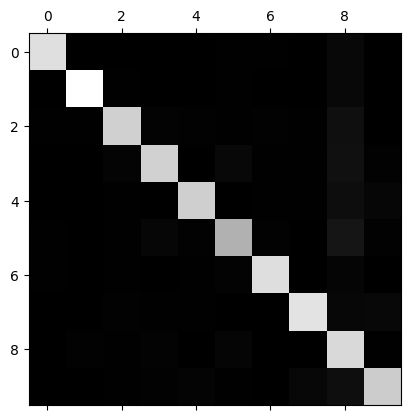

In [56]:
plt.matshow(cm, cmap = plt.cm.gray)
plt.show()

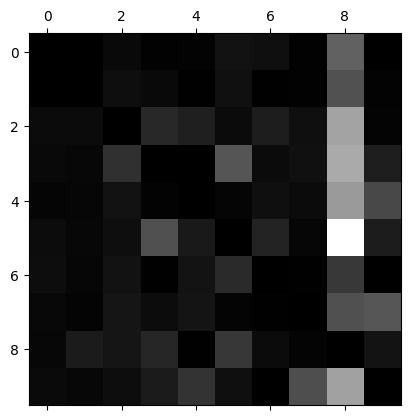

In [59]:
row_sums = cm.sum(axis=1, keepdims=True)
cmf = cm/row_sums
np.fill_diagonal(cmf, 0)
plt.matshow(cmf, cmap = plt.cm.gray)
plt.show()

# This shows that some images are misclassified as 8, and there are also some problems with 3s and 5s